Redes Neuronal Convolucional aplicadas en
MNIST reconocimiento de dígitos manuscritos

In [ ]:
import keras
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

Cargar el conjunto de datos

In [ ]:
#Cargar el conjunto de datos
mnist = keras.datasets.mnist
#Cargar divison de entrenamiento y pruebas
(training_images, training_labels), (test_images, test_labels) = mnist.load_data()

11490434/11490434 [==============================] - 0s 0us/step


Normalizacion de datos

In [ ]:
training_images = training_images /255.0
test_images = test_images /255.0


Construccion del modelo

In [ ]:
#Construccion del modelo
model = keras.models.Sequential([
 # Agregar convoluciones y max poloing
    keras.layers.Conv2D(32, (3,3), activation='relu', input_shape=(28,28,1)),
    keras.layers.MaxPooling2D(2,2),
 # Agregar las mismas capas que antes
 keras.layers.Flatten(),
 keras.layers.Dense(128, activation='relu'),
 keras.layers.Dense(10, activation='softmax')
])
model.summary()



Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 26, 26, 32)        320       
                                                                 
 max_pooling2d (MaxPooling2  (None, 13, 13, 32)        0         
 D)                                                              
                                                                 
 flatten (Flatten)           (None, 5408)              0         
                                                                 
 dense (Dense)               (None, 128)               692352    
                                                                 
 dense_1 (Dense)             (None, 10)                1290      
                                                                 
Total params: 693962 (2.65 MB)
Trainable params: 693962 (2.65 MB)
Non-trainable params: 0 (0.00 Byte)
____________________

Compilar el modelo

In [ ]:
#Compilar el modelo
model.compile(optimizer='adam',
               loss='sparse_categorical_crossentropy',
               metrics=['accuracy'])


Entrenamiento del modelo

Epoch 1/10
1875/1875 [==============================] - 44s 23ms/step - loss: 0.1500 - accuracy: 0.9550
Epoch 2/10
1875/1875 [==============================] - 40s 21ms/step - loss: 0.0526 - accuracy: 0.9841
Epoch 3/10
1875/1875 [==============================] - 38s 21ms/step - loss: 0.0324 - accuracy: 0.9895
Epoch 4/10
1875/1875 [==============================] - 37s 20ms/step - loss: 0.0213 - accuracy: 0.9937
Epoch 5/10
1875/1875 [==============================] - 39s 21ms/step - loss: 0.0144 - accuracy: 0.9952
Epoch 6/10
1875/1875 [==============================] - 41s 22ms/step - loss: 0.0098 - accuracy: 0.9969
Epoch 7/10
1875/1875 [==============================] - 40s 21ms/step - loss: 0.0080 - accuracy: 0.9975
Epoch 8/10
1875/1875 [==============================] - 39s 21ms/step - loss: 0.0059 - accuracy: 0.9983
Epoch 9/10
1875/1875 [==============================] - 39s 21ms/step - loss: 0.0048 - accuracy: 0.9985
Epoch 10/10
1875/1875 [==============================] - 41s 22m

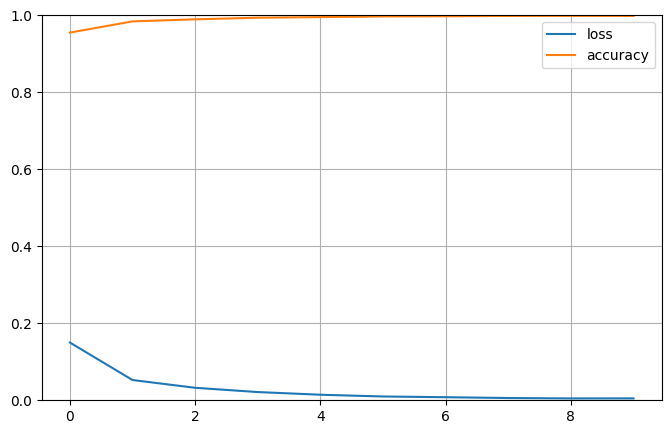

In [ ]:
#Entrenar el modelo
history = model.fit(training_images, training_labels, epochs= 10)

#Graficar el historial de entrenamieto
pd.DataFrame(history.history).plot(figsize=(8,5))
plt.grid(True)
plt.gca().set_ylim(0,1)
plt.show()


Ealuacion del modelo

In [ ]:
#Evaluar el modelo en el conjunto de entrenamiento
loss, accuracy = model.evaluate(training_images, training_labels)

print("Perdida del conjunto de entrenamiento",loss)
print("Precision en el conjunto de entrenamiento",accuracy)

#Evaluar el modelo con datos no vistos
loss, accuracy = model.evaluate(test_images, test_labels)

print("Perdida del conjunto de prueba",loss)
print("Precision en el conjunto de prueba",accuracy)

1875/1875 [==============================] - 16s 8ms/step - loss: 0.0043 - accuracy: 0.9985
Perdida del conjunto de entrenamiento 0.00428883358836174
Precision en el conjunto de entrenamiento 0.9984999895095825
313/313 [==============================] - 2s 6ms/step - loss: 0.0667 - accuracy: 0.9856
Perdida del conjunto de prueba 0.06666853278875351
Precision en el conjunto de prueba 0.9855999946594238


Prediccion

In [ ]:
#Prediccion
index = 1
print(f'Label: {test_labels[index]}')
clasificacion = model.predict(test_images[index:index+1])
print(f'Prediccion: \n {clasificacion.reshape(-1,1)}')




Label: 2
1/1 [==============================] - 0s 115ms/step
Prediccion: 
 [[3.9971752e-11]
 [4.9725966e-09]
 [1.0000000e+00]
 [3.4502449e-15]
 [1.1092645e-18]
 [3.9139594e-19]
 [1.1312627e-12]
 [1.2605448e-16]
 [1.9957808e-13]
 [2.3287267e-15]]


Etiquetas de 30 primeras imagenes dl conjunto de prueba

In [ ]:
print(test_labels[:30] )

[7 2 1 0 4 1 4 9 5 9 0 6 9 0 1 5 9 7 3 4 9 6 6 5 4 0 7 4 0 1]


Seleccion de imagenes de interes

In [ ]:
FIRST_IMAGE = 3
SECOND_IMAGE = 10
THIRD_IMAGE = 25

#Para 7
#FIRST_IMAGE = 2
#SECOND_IMAGE = 5
#THIRD_IMAGE = 14

print (test_labels[FIRST_IMAGE])
print (test_labels[SECOND_IMAGE])
print (test_labels[THIRD_IMAGE])


0
0
0


Visualizacion de Imagenes

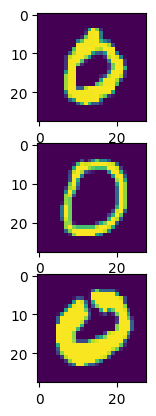

In [ ]:
f, axarr = plt.subplots(3,1)
axarr[0].imshow(test_images[FIRST_IMAGE])
axarr[1].imshow(test_images[SECOND_IMAGE])
axarr[2].imshow(test_images[THIRD_IMAGE])

Extraccion de Activaciones  para extraer las activaciones de la capa especi

In [ ]:
layer = 0
filter1 = 0
filter2 = 0

layer_outputs = [layer.output for layer in model.layers]
activation_model = keras.models.Model(inputs=model.input, outputs=layer_outputs)

Visualizacion de convoluciones

1/1 [==============================] - 0s 20ms/step


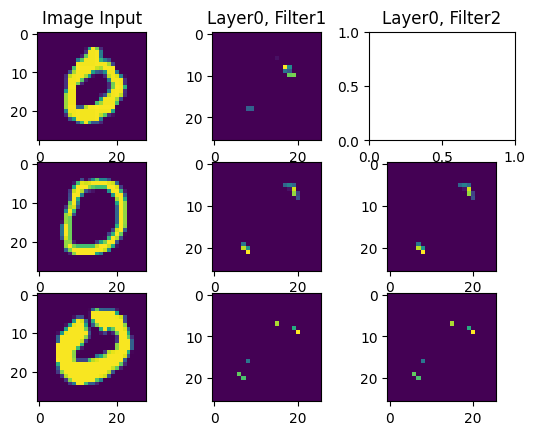

In [ ]:
f, axarr = plt.subplots(3,3)

axarr[0,0].set_title('Image Input')
axarr[0,0].imshow(test_images[FIRST_IMAGE])
f1 = activation_model.predict(test_images[FIRST_IMAGE].reshape(1,28,28,1))[layer]
axarr[0,1].set_title('Layer' + str(layer) + ", Filter1")
axarr[0,1].imshow(f1[0,: , :, filter1])
axarr[0,2].set_title('Layer' + str(layer) + ", Filter2")
axarr[0,1].imshow(f1[0,: , :, filter2])

axarr[1,0].imshow(test_images[SECOND_IMAGE])
f2 = activation_model.predict(test_images[SECOND_IMAGE].reshape(1,28,28,1))[layer]
axarr[1,1].imshow(f2[0,: , :, filter1])
axarr[1,2].imshow(f2[0,: , :, filter2])

axarr[2,0].imshow(test_images[THIRD_IMAGE])
f3 = activation_model.predict(test_images[THIRD_IMAGE].reshape(1,28,28,1))[layer]
axarr[2,1].imshow(f3[0,: , :, filter1])
axarr[2,2].imshow(f3[0,: , :, filter2])
